<a href="https://colab.research.google.com/github/Godshley/Kaggle-IA/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# ===============================================
# 02 - preprocesado.ipynb
# Proyecto: UdeA AI 4 Eng 20252 - Pruebas Saber Pro Colombia
# ===============================================

# --- Importaci√≥n de librer√≠as ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# --- Cargar los datos ---
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("‚úÖ Datos cargados correctamente.")
print(f"Tama√±o del train: {train.shape}")
print(f"Tama√±o del test: {test.shape}")

# --- Inspecci√≥n inicial ---
print("\n--- Vista previa del train ---")
display(train.head())

print("\n--- Tipos de datos ---")
print(train.dtypes)

# --- Identificar variable objetivo ---
target_col = "RENDIMIENTO_GLOBAL"  # nombre del target (puedes ajustar si cambia)
if target_col in train.columns:
    print(f"\nüéØ Variable objetivo detectada: '{target_col}'")
else:
    raise ValueError("No se encontr√≥ la columna de target en train.csv")

# --- Separar caracter√≠sticas y etiqueta ---
X_train = train.drop(columns=[target_col])
y_train = train[target_col]
X_test = test.copy()

# --- Detectar tipos de variables ---
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print("\nColumnas num√©ricas:", len(num_cols))
print("Columnas categ√≥ricas:", len(cat_cols))

# --- Imputar valores faltantes ---
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

print("‚úÖ Imputaci√≥n de valores faltantes completada.")

# --- Codificaci√≥n de variables categ√≥ricas ---
label_enc = LabelEncoder()

label_cols = [c for c in cat_cols if X_train[c].nunique() <= 10]

for col in label_cols:
    X_train[col] = label_enc.fit_transform(X_train[col])
    X_test[col] = label_enc.transform(X_test[col])

print(f"‚úÖ Columnas codificadas con LabelEncoder: {label_cols}")

# One-Hot Encoding para el resto
onehot_cols = [c for c in cat_cols if c not in label_cols]

X_train = pd.get_dummies(X_train, columns=onehot_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=onehot_cols, drop_first=True)

# --- Alinear columnas entre train y test ---
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print(f"‚úÖ One-Hot Encoding aplicado y alineaci√≥n completada.")
print(f"Shapes finales -> X_train: {X_train.shape}, X_test: {X_test.shape}")

# --- Normalizaci√≥n de variables num√©ricas ---
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("‚úÖ Escalamiento de variables num√©ricas completado.")

# --- Dataset final ---
train_preprocessed = pd.concat([X_train, y_train], axis=1)

print("\n--- Datos preprocesados listos ---")
display(train_preprocessed.head())
display(X_test.head())

# --- Guardar versiones preprocesadas ---
train_preprocessed.to_csv("train_preprocessed.csv", index=False)
X_test.to_csv("test_preprocessed.csv", index=False)

print("üíæ Archivos guardados: train_preprocessed.csv y test_preprocessed.csv")

‚úÖ Datos cargados correctamente.
Tama√±o del train: (692500, 21)
Tama√±o del test: (296786, 20)

--- Vista previa del train ---


ID  PERIODO_ACADEMICO            E_PRGM_ACADEMICO E_PRGM_DEPARTAMENTO  \
0  904256              20212                  ENFERMERIA              BOGOT√Å   
1  645256              20212                     DERECHO           ATLANTICO   
2  308367              20203       MERCADEO Y PUBLICIDAD              BOGOT√Å   
3  470353              20195  ADMINISTRACION DE EMPRESAS           SANTANDER   
4  989032              20212                  PSICOLOGIA           ANTIOQUIA   

                E_VALORMATRICULAUNIVERSIDAD E_HORASSEMANATRABAJA  \
0  Entre 5.5 millones y menos de 7 millones    Menos de 10 horas   
1  Entre 2.5 millones y menos de 4 millones                    0   
2  Entre 2.5 millones y menos de 4 millones      M√°s de 30 horas   
3  Entre 4 millones y menos de 5.5 millones                    0   
4  Entre 2.5 millones y menos de 4 millones  Entre 21 y 30 horas   

  F_ESTRATOVIVIENDA F_TIENEINTERNET                    F_EDUCACIONPADRE  \
0         Estrato 3              Si    T√©cnica o tecnol√≥gica incompleta   
1         Estrato 3              No      T√©cnica o tecnol√≥gica completa   
2         Estrato 3              Si  Secundaria (Bachillerato) completa   
3         Estrato 4              Si                             No sabe   
4         Estrato 3              Si                   Primaria completa   

  F_TIENELAVADORA  ... E_PRIVADO_LIBERTAD E_PAGOMATRICULAPROPIO  \
0              Si  ...                  N                    No   
1              Si  ...                  N                    No   
2              Si  ...                  N                    No   
3              Si  ...                  N                    No   
4              Si  ...                  N                    No   

  F_TIENECOMPUTADOR F_TIENEINTERNET.1                    F_EDUCACIONMADRE  \
0                Si                Si                           Postgrado   
1                Si                No    T√©cnica o tecnol√≥gica incompleta   
2                No                Si  Secundaria (Bachillerato) completa   
3                Si                Si  Secundaria (Bachillerato) completa   
4                Si                Si                   Primaria completa   

  RENDIMIENTO_GLOBAL INDICADOR_1  INDICADOR_2  INDICADOR_3  INDICADOR_4  
0         medio-alto       0.322        0.208        0.310        0.267  
1               bajo       0.311        0.215        0.292        0.264  
2               bajo       0.297        0.214        0.305        0.264  
3               alto       0.485        0.172        0.252        0.190  
4         medio-bajo       0.316        0.232        0.285        0.294  

[5 rows x 21 columns]


--- Tipos de datos ---
ID                               int64
PERIODO_ACADEMICO                int64
E_PRGM_ACADEMICO                object
E_PRGM_DEPARTAMENTO             object
E_VALORMATRICULAUNIVERSIDAD     object
E_HORASSEMANATRABAJA            object
F_ESTRATOVIVIENDA               object
F_TIENEINTERNET                 object
F_EDUCACIONPADRE                object
F_TIENELAVADORA                 object
F_TIENEAUTOMOVIL                object
E_PRIVADO_LIBERTAD              object
E_PAGOMATRICULAPROPIO           object
F_TIENECOMPUTADOR               object
F_TIENEINTERNET.1               object
F_EDUCACIONMADRE                object
RENDIMIENTO_GLOBAL              object
INDICADOR_1                    float64
INDICADOR_2                    float64
INDICADOR_3                    float64
INDICADOR_4                    float64
dtype: object

üéØ Variable objetivo detectada: 'RENDIMIENTO_GLOBAL'

Columnas num√©ricas: 6
Columnas categ√≥ricas: 14
‚úÖ Imputaci√≥n de valores faltantes 

ID  PERIODO_ACADEMICO  E_VALORMATRICULAUNIVERSIDAD  \
0  1.434424           1.294094                            3   
1  0.527513           1.294094                            1   
2 -0.652132           0.439801                            1   
3 -0.084924          -0.319570                            2   
4  1.731274           1.294094                            1   

   E_HORASSEMANATRABAJA  F_ESTRATOVIVIENDA  F_TIENEINTERNET  F_TIENELAVADORA  \
0                     3                  2                1                1   
1                     0                  2                0                1   
2                     4                  2                1                1   
3                     0                  3                1                1   
4                     2                  2                1                1   

   F_TIENEAUTOMOVIL  E_PRIVADO_LIBERTAD  E_PAGOMATRICULAPROPIO  ...  \
0                 1                   0                      0  ...   
1                 0                   0                      0  ...   
2                 0                   0                      0  ...   
3                 0                   0                      0  ...   
4                 1                   0                      0  ...   

   F_EDUCACIONMADRE_No Aplica  F_EDUCACIONMADRE_No sabe  \
0                       False                     False   
1                       False                     False   
2                       False                     False   
3                       False                     False   
4                       False                     False   

   F_EDUCACIONMADRE_Postgrado  F_EDUCACIONMADRE_Primaria completa  \
0                        True                               False   
1                       False                               False   
2                       False                               False   
3                       False                               False   
4                       False                                True   

   F_EDUCACIONMADRE_Primaria incompleta  \
0                                 False   
1                                 False   
2                                 False   
3                                 False   
4                                 False   

   F_EDUCACIONMADRE_Secundaria (Bachillerato) completa  \
0                                              False     
1                                              False     
2                                               True     
3                                               True     
4                                              False     

   F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta  \
0                                              False       
1                                              False       
2                                              False       
3                                              False       
4                                              False       

   F_EDUCACIONMADRE_T√©cnica o tecnol√≥gica completa  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   F_EDUCACIONMADRE_T√©cnica o tecnol√≥gica incompleta  RENDIMIENTO_GLOBAL  
0                                              False          medio-alto  
1                                               True                bajo  
2                                              False                bajo  
3                                              False                alto  
4                                              False          medio-bajo  

[5 rows x 1016 columns]

ID  PERIODO_ACADEMICO  E_VALORMATRICULAUNIVERSIDAD  \
0  0.194793          -1.458627                            5   
1 -1.386841           0.439801                            1   
2  0.016012           1.294094                            0   
3  1.009765          -0.319570                            0   
4  1.017486           1.294094                            1   

   E_HORASSEMANATRABAJA  F_ESTRATOVIVIENDA  F_TIENEINTERNET  F_TIENELAVADORA  \
0                     3                  2                1                1   
1                     2                  1                1                1   
2                     0                  2                1                1   
3                     2                  0                0                1   
4                     1                  1                1                1   

   F_TIENEAUTOMOVIL  E_PRIVADO_LIBERTAD  E_PAGOMATRICULAPROPIO  ...  \
0                 0                   0                      1  ...   
1                 0                   0                      0  ...   
2                 0                   0                      0  ...   
3                 0                   0                      0  ...   
4                 0                   0                      0  ...   

   F_EDUCACIONMADRE_Ninguno  F_EDUCACIONMADRE_No Aplica  \
0                     False                       False   
1                     False                       False   
2                     False                       False   
3                     False                       False   
4                     False                       False   

   F_EDUCACIONMADRE_No sabe  F_EDUCACIONMADRE_Postgrado  \
0                     False                       False   
1                     False                       False   
2                     False                       False   
3                     False                       False   
4                     False                       False   

   F_EDUCACIONMADRE_Primaria completa  F_EDUCACIONMADRE_Primaria incompleta  \
0                                True                                 False   
1                               False                                 False   
2                               False                                 False   
3                               False                                  True   
4                               False                                 False   

   F_EDUCACIONMADRE_Secundaria (Bachillerato) completa  \
0                                              False     
1                                              False     
2                                               True     
3                                              False     
4                                               True     

   F_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta  \
0                                              False       
1                                              False       
2                                              False       
3                                              False       
4                                              False       

   F_EDUCACIONMADRE_T√©cnica o tecnol√≥gica completa  \
0                                            False   
1                                             True   
2                                            False   
3                                            False   
4                                            False   

   F_EDUCACIONMADRE_T√©cnica o tecnol√≥gica incompleta  
0                                              False  
1                                              False  
2                                              False  
3                                              False  
4                                              False  

[5 rows x 1015 columns]

üíæ Archivos guardados: train_preprocessed.csv y test_preprocessed.csv


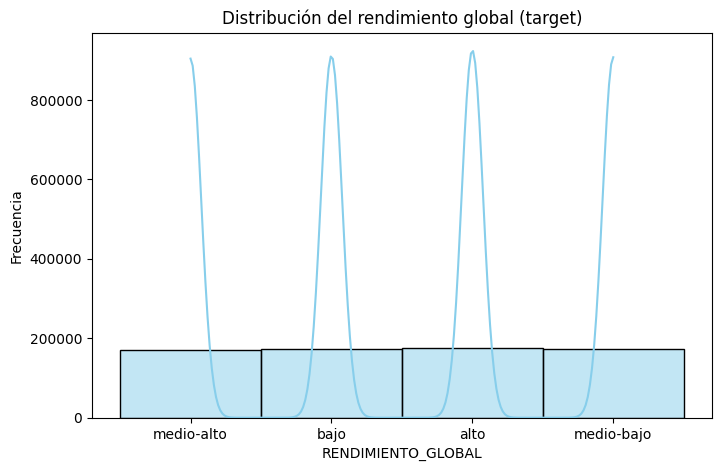

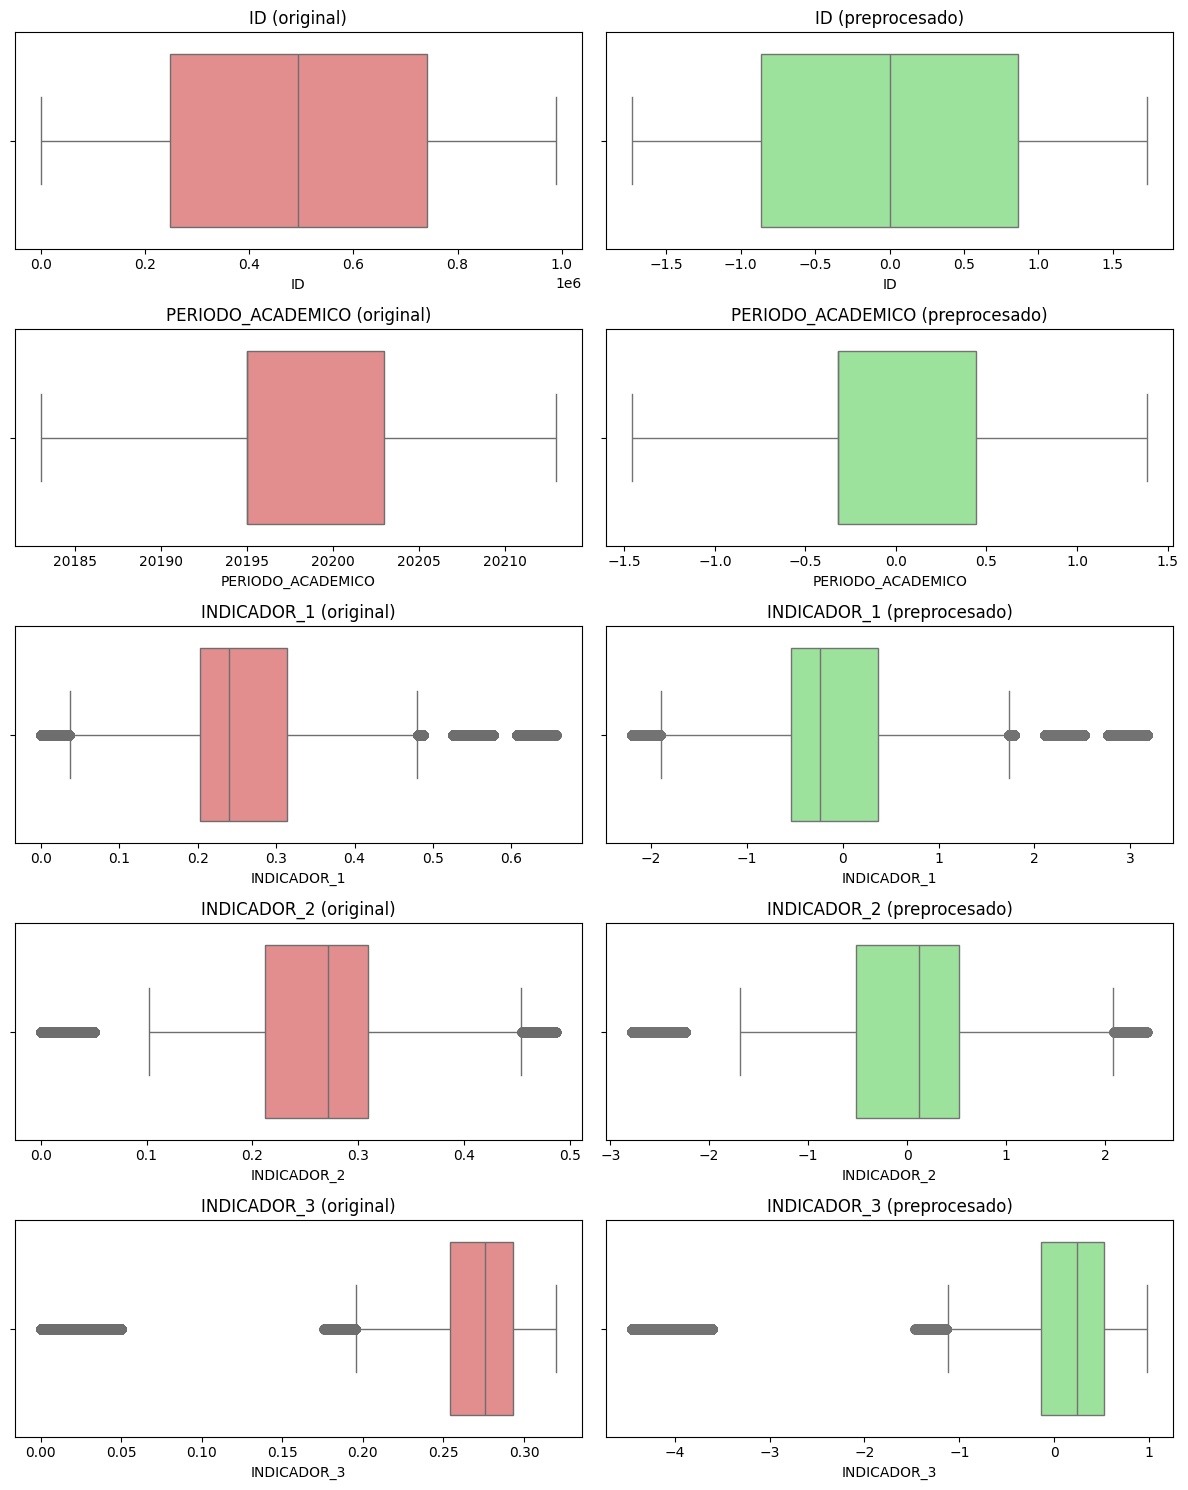

N√∫mero de columnas originales: 21
N√∫mero de columnas preprocesadas: 1016


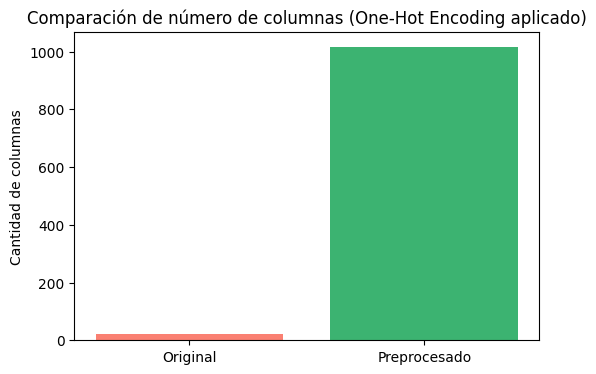

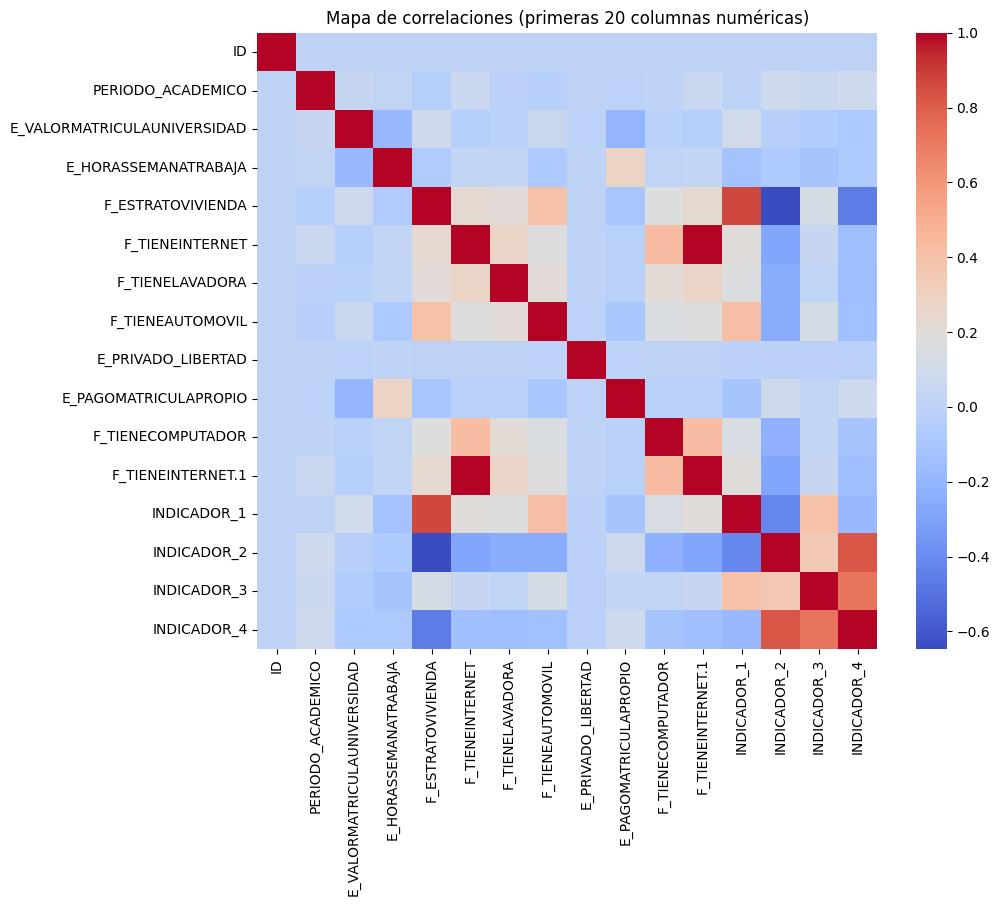

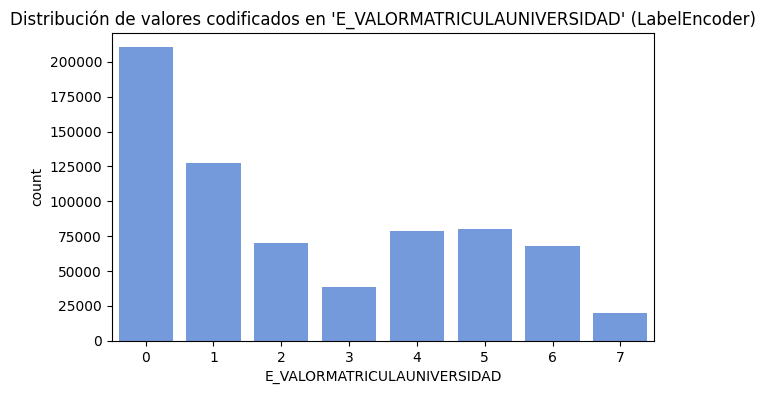

In [6]:
# ===============================================
# VISUALIZACI√ìN DE LOS DATOS PREPROCESADOS
# ===============================================

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1Ô∏è‚É£ Distribuci√≥n del target (solo en train) ---
plt.figure(figsize=(8, 5))
sns.histplot(train_preprocessed["RENDIMIENTO_GLOBAL"], bins=20, kde=True, color="skyblue")
plt.title("Distribuci√≥n del rendimiento global (target)")
plt.xlabel("RENDIMIENTO_GLOBAL")
plt.ylabel("Frecuencia")
plt.show()

# --- 2Ô∏è‚É£ Comparar variables num√©ricas antes y despu√©s del escalado ---
# Escogemos algunas columnas num√©ricas representativas
sample_num_cols = num_cols[:5]  # primeras 5 num√©ricas (puedes ajustar)
fig, axes = plt.subplots(len(sample_num_cols), 2, figsize=(12, len(sample_num_cols) * 3))

for i, col in enumerate(sample_num_cols):
    sns.boxplot(x=train[col], ax=axes[i, 0], color="lightcoral")
    axes[i, 0].set_title(f"{col} (original)")
    sns.boxplot(x=train_preprocessed[col], ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f"{col} (preprocesado)")

plt.tight_layout()
plt.show()

# --- 3Ô∏è‚É£ Conteo de columnas despu√©s del One-Hot Encoding ---
print(f"N√∫mero de columnas originales: {train.shape[1]}")
print(f"N√∫mero de columnas preprocesadas: {train_preprocessed.shape[1]}")

plt.figure(figsize=(6, 4))
plt.bar(["Original", "Preprocesado"],
        [train.shape[1], train_preprocessed.shape[1]],
        color=["salmon", "mediumseagreen"])
plt.title("Comparaci√≥n de n√∫mero de columnas (One-Hot Encoding aplicado)")
plt.ylabel("Cantidad de columnas")
plt.show()

# --- 4Ô∏è‚É£ Mapa de calor de correlaciones en el dataset preprocesado ---
# (solo para las primeras 20 columnas num√©ricas, por visualizaci√≥n)
corr = train_preprocessed.select_dtypes(include=["float64", "int64"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr.head(20).iloc[:20, :20], cmap="coolwarm", annot=False)
plt.title("Mapa de correlaciones (primeras 20 columnas num√©ricas)")
plt.show()

# --- 5Ô∏è‚É£ Distribuci√≥n de un par de columnas codificadas (LabelEncoder) ---
if label_cols:
    example_col = label_cols[0]
    plt.figure(figsize=(7, 4))
    sns.countplot(x=train_preprocessed[example_col], color="cornflowerblue")
    plt.title(f"Distribuci√≥n de valores codificados en '{example_col}' (LabelEncoder)")
    plt.show()
